In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')

In [43]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr']:
    try:
        odf = pd.read_csv(f"./results/beijinga_scaled/{reg}/final.csv")
        temp.append(odf[odf["is_val_error"] == False])
    except:
        pass
df = pd.concat(temp)

Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Val.')

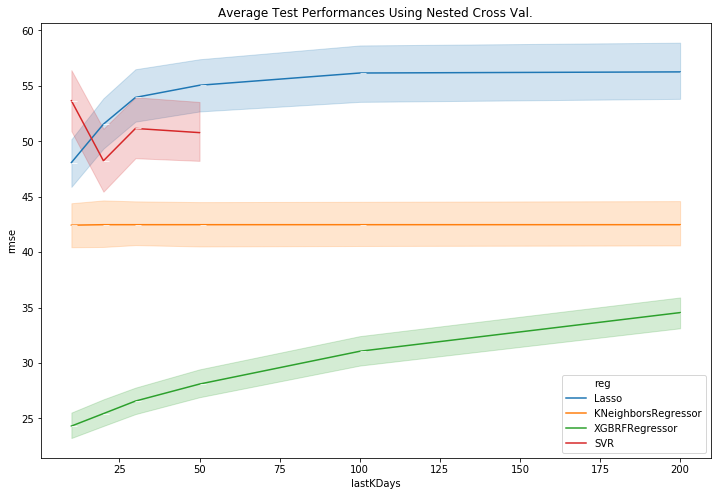

In [44]:
# trying to see what is the effect of LastKDays
# if we have a perticular set of hyperparameter set
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, marker=True, x = "lastKDays", y="rmse", hue="reg")
plt.title(f"Average Test Performances Using Nested Cross Val.")

In [49]:
odf = pd.read_csv(f"./results/beijingb_scaled/xgb/final.csv")
odf = odf[odf["is_val_error"] == True]

In [51]:
odf.groupby("hy_ix").mean()

,is_val_error,stepSize,lastKDays,kout,kin,time_ix,rmse,mae
hy_ix,,,,,,,,
0,True,2.0,68.333333,2.5,2.001627,193.657178,21.898339,17.625837
1,True,2.0,68.333333,2.5,2.001627,193.657178,84.235373,81.009444
2,True,2.0,68.333333,2.5,2.001627,193.657178,63.830440,60.294447
3,True,2.0,68.333333,2.5,2.001627,193.657178,45.619471,41.658613
4,True,2.0,68.333333,2.5,2.001627,193.657178,28.648202,24.669573
5,True,2.0,68.333333,2.5,2.001627,193.657178,22.041301,16.999263
6,True,2.0,68.333333,2.5,2.001627,193.657178,21.949621,16.924361
7,True,2.0,68.333333,2.5,2.001627,193.657178,84.241663,81.017801
8,True,2.0,68.333333,2.5,2.001627,193.657178,63.857002,60.330595


In [59]:
hyperparameters = [{}]

In [60]:
depths = [10, 50]
lrs = [0.01, 0.1, 1]
estimators = [10, 50]
for depth in depths:
    for lr in lrs:
        for estimator in estimators:
            hy = {
                'max_depth': depth,
                'learning_rate': lr,
                'n_estimators': estimator,
            }
            hyperparameters.append(hy)

In [61]:
hyperparameters

[{},
 {'max_depth': 10, 'learning_rate': 0.01, 'n_estimators': 10},
 {'max_depth': 10, 'learning_rate': 0.01, 'n_estimators': 50},
 {'max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 10},
 {'max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 50},
 {'max_depth': 10, 'learning_rate': 1, 'n_estimators': 10},
 {'max_depth': 10, 'learning_rate': 1, 'n_estimators': 50},
 {'max_depth': 50, 'learning_rate': 0.01, 'n_estimators': 10},
 {'max_depth': 50, 'learning_rate': 0.01, 'n_estimators': 50},
 {'max_depth': 50, 'learning_rate': 0.1, 'n_estimators': 10},
 {'max_depth': 50, 'learning_rate': 0.1, 'n_estimators': 50},
 {'max_depth': 50, 'learning_rate': 1, 'n_estimators': 10},
 {'max_depth': 50, 'learning_rate': 1, 'n_estimators': 50}]

In [64]:
[print(hyperparameters[i]) for i in [0, 5, 6, 11, 12]]

{}
{'max_depth': 10, 'learning_rate': 1, 'n_estimators': 10}
{'max_depth': 10, 'learning_rate': 1, 'n_estimators': 50}
{'max_depth': 50, 'learning_rate': 1, 'n_estimators': 10}
{'max_depth': 50, 'learning_rate': 1, 'n_estimators': 50}


[None, None, None, None, None]